<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据集说明" data-toc-modified-id="数据集说明-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据集说明</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#城镇犯罪率与房屋价格" data-toc-modified-id="城镇犯罪率与房屋价格-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>城镇犯罪率与房屋价格</a></span></li><li><span><a href="#平均房间数与房价" data-toc-modified-id="平均房间数与房价-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>平均房间数与房价</a></span></li><li><span><a href="#特征相关性分析" data-toc-modified-id="特征相关性分析-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>特征相关性分析</a></span></li></ul></li><li><span><a href="#特征选取" data-toc-modified-id="特征选取-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>特征选取</a></span></li><li><span><a href="#train_test_split" data-toc-modified-id="train_test_split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>train_test_split</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></div>

# Regression Demo (Boston housing dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.style.available
style='tableau-colorblind10'
sns.set_style('whitegrid')

## 数据集说明

波士顿房价数据集统计的是20世纪70年代中期波士顿各个郊区房价的中位数

| 属性 | 描述 |
| :- | :- |
| CRIM | 城镇的人均犯罪率 |
| 
| ZN | 住宅用地比例 |
| 
| INDUS | 城镇非商业用地比例 |
| 
| CHAS | 查尔斯河虚拟变量（如果环河，则等于1；否则等于0） |
| 
| NOX | 一氧化氮的浓度 |
| 
| RM | 每个住宅的平均房间数 |
| 
| AGE | 1940年之前建造的自有住房的比例 |
| 
| DIS | 到五个波士顿就业中心的加权距离 |
| 
| RAD | 距离高速公路的便利指数 |
| 
| TAX | 不动产税 |
| 
| PTRATIO | 城镇中师生比率 |
| 
| B | 城镇中黑人比例 |
| 
| LSTAT | 低层次人口的所占比例 |
| 
| MEDV | 自有住房数的中位数，单位为 $1000 | 

In [19]:
from sklearn import datasets
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## EDA

### 城镇犯罪率与房屋价格

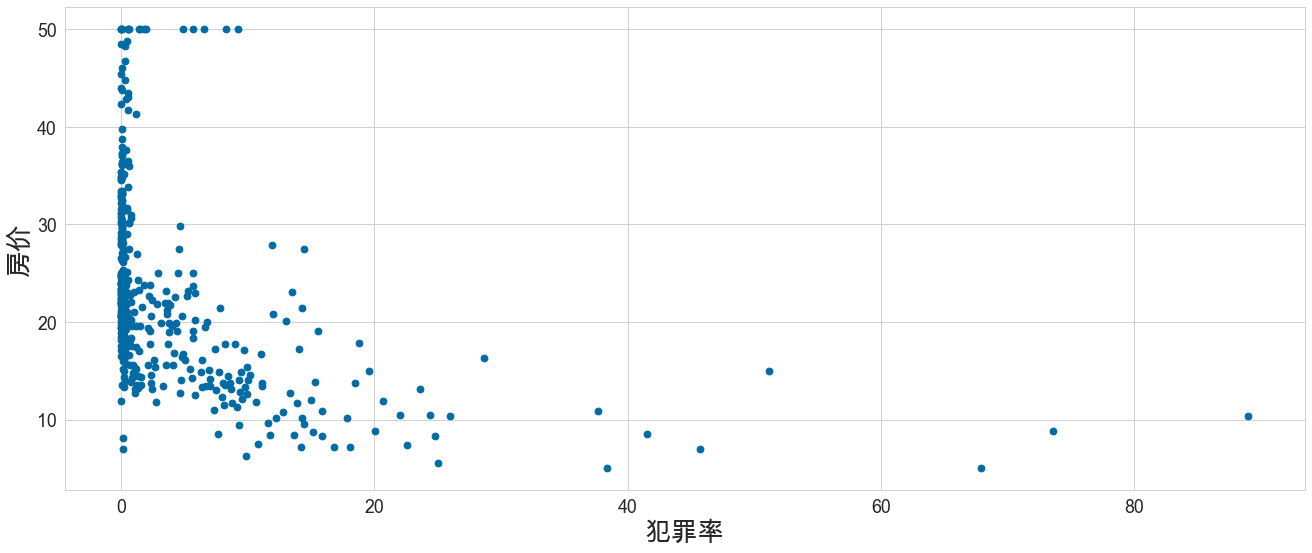

In [27]:
x = df_boston['CRIM']
y = df_boston['target']

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20, 8), dpi=80)
plt.style.use(style)
plt.xlabel('犯罪率', size=24)
plt.ylabel('房价', size=24)

plt.xticks(size=16)
plt.yticks(size=16) 

plt.scatter(x, y);

### 平均房间数与房价

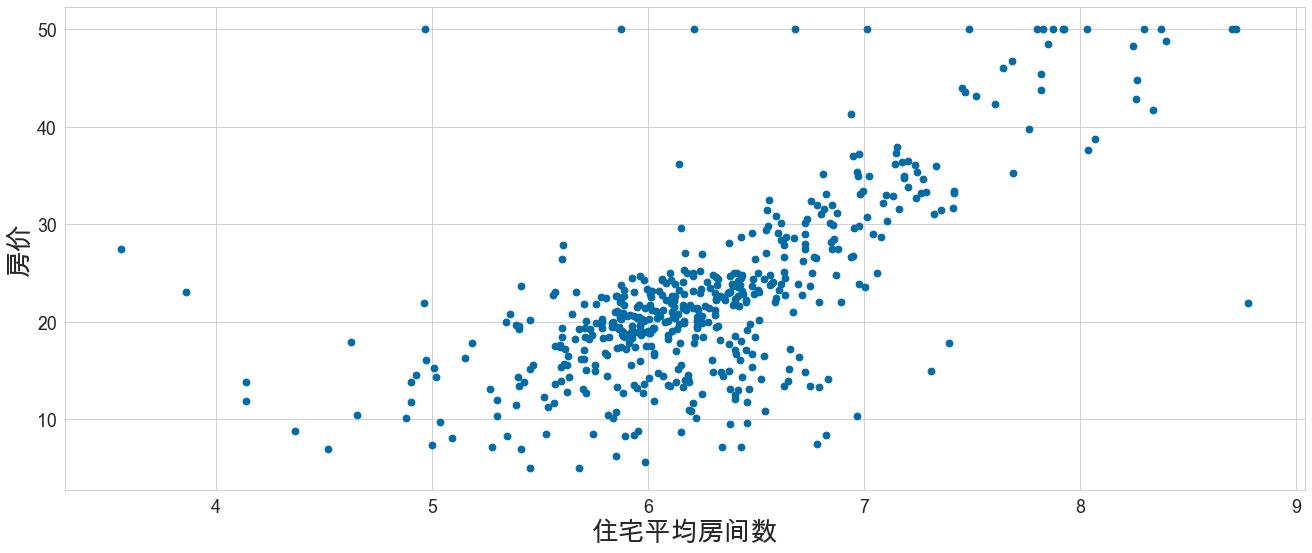

In [30]:
x = df_boston['RM']
y = df_boston['target']

plt.figure(figsize=(20, 8), dpi=80)
plt.style.use(style)
plt.xlabel('住宅平均房间数', size=24)
plt.ylabel('房价', size=24)

plt.xticks(size=16) 
plt.yticks(size=16) 

plt.scatter(x, y);

### 特征相关性分析

In [32]:
# 相关系数矩阵
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


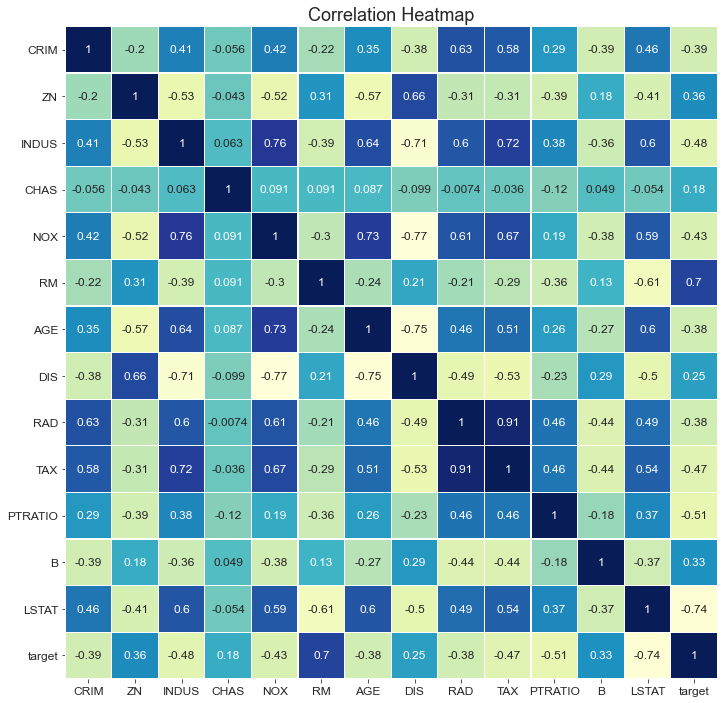

In [60]:
# heatmap

plt.figure(figsize=(14,12))
#plt.style.use('ggplot')
#sns.set_style('ticks')
plt.title('Correlation Heatmap',size=18)
sns.heatmap(df_boston.corr(),
            annot=True,
            linecolor='white',
            cbar=False,
            linewidths=0.1,
            square=True,
            annot_kws={"size":12},
            cmap="YlGnBu")
plt.yticks(rotation=0,size=12)
plt.xticks(size=12);

## 特征选取

In [64]:
# 由相关系数矩阵，选取与target variable相关性最强的RM、LSTAT、PTRATIO作为特征变量

X=df_boston[['RM','LSTAT','PTRATIO']]
X

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0


In [65]:
y=df_boston['target']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

## train_test_split

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y, 
                                               test_size=0.2,
                                               random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 3), (102, 3), (404,), (102,))

In [67]:
X_train

,RM,LSTAT,PTRATIO
477,5.304,24.91,20.2
15,5.834,8.47,21.0
332,6.031,7.83,16.9
423,6.103,23.29,20.2
19,5.727,11.28,21.0
...,...,...,...
106,5.836,18.66,20.9
270,5.856,13.00,18.6
348,6.635,5.99,17.0
435,6.629,23.27,20.2


In [68]:
X_test

,RM,LSTAT,PTRATIO
173,6.416,9.04,16.6
274,6.758,3.53,17.6
491,5.983,18.07,20.1
72,6.065,5.52,19.2
452,6.297,17.27,20.2
...,...,...,...
412,4.628,34.37,20.2
436,6.461,18.05,20.2
411,6.657,21.22,20.2
86,6.015,12.86,18.5


## Feature Scaling

用训练集学习到的方差和标准差transform测试集，防止leakage.

`from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_tranform(X_train)
sc.tranform(X_test)`

In [70]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_train_sc

array([[-1.42806858,  1.75350503,  0.84534281],
       [-0.68008655, -0.5614742 ,  1.20474139],
       [-0.40206304, -0.65159505, -0.63717631],
       ...,
       [ 0.45035421, -0.91069248, -0.59225149],
       [ 0.44188648,  1.52257036,  0.84534281],
       [ 0.12575823, -0.25731635,  1.15981657]])

In [73]:
X_test_sc=sc.transform(X_test)
X_test_sc

array([[ 0.14128239, -0.48121032, -0.77195078],
       [ 0.62394249, -1.25709448, -0.32270256],
       [-0.46980481,  0.79033849,  0.80041799],
       [-0.35407929, -0.97687498,  0.39609459],
       [-0.02666075,  0.67768743,  0.84534281],
       [-0.05206391, -0.06862583,  0.17147048],
       [-0.5671836 ,  0.82695008,  0.03669602],
       [-0.20024903,  1.64789466,  1.29459104],
       [-0.12262825,  0.05810661,  0.84534281],
       [-0.40770819,  0.26369479,  0.39609459],
       [-0.51496599,  0.76921641, -0.86180042],
       [-0.44016779,  0.65374908, -1.40089829],
       [-2.53592874,  3.45312786,  0.84534281],
       [-0.11839439, -0.01652471,  0.17147048],
       [-0.85790869, -0.101013  ,  0.57579388],
       [ 0.93724817, -0.11227811,  0.84534281],
       [-0.61657864,  0.72133972,  0.35116977],
       [-2.0264542 ,  2.55755195,  0.84534281],
       [ 2.20034989, -1.33595022, -1.76029686],
       [-0.18472487,  0.79878732,  0.84534281],
       [-0.1071041 , -0.82620419,  0.126

In [75]:
#a=sc.fit(X_train)
#a

StandardScaler()

## Modelling

In [76]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train_sc,y_train)

LinearRegression()

In [77]:
y_train_pred=regressor.predict(X_train_sc)
y_test_pred=regressor.predict(X_test_sc)

In [79]:
y_train_pred.shape

(404,)

In [80]:
y_test_pred.shape

(102,)

In [87]:
y_test.shape

(102,)

In [84]:
y_test[:20]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
76     20.0
316    17.8
140    14.0
471    19.6
500    16.8
218    21.5
9      18.9
414     7.0
78     21.2
323    18.5
473    29.8
124    18.8
388    10.2
195    50.0
448    14.1
Name: target, dtype: float64

In [83]:
y_test_pred[:20]

array([26.71839575, 30.66329109, 16.42637714, 24.72870795, 18.34236753,
       22.55998071, 17.41260032, 12.96100189, 20.50226937, 19.54487043,
       19.56183682, 21.32884903, -1.60676806, 22.11828757, 19.0932238 ,
       24.89326357, 17.05831926,  3.78100828, 39.265878  , 17.30213002])

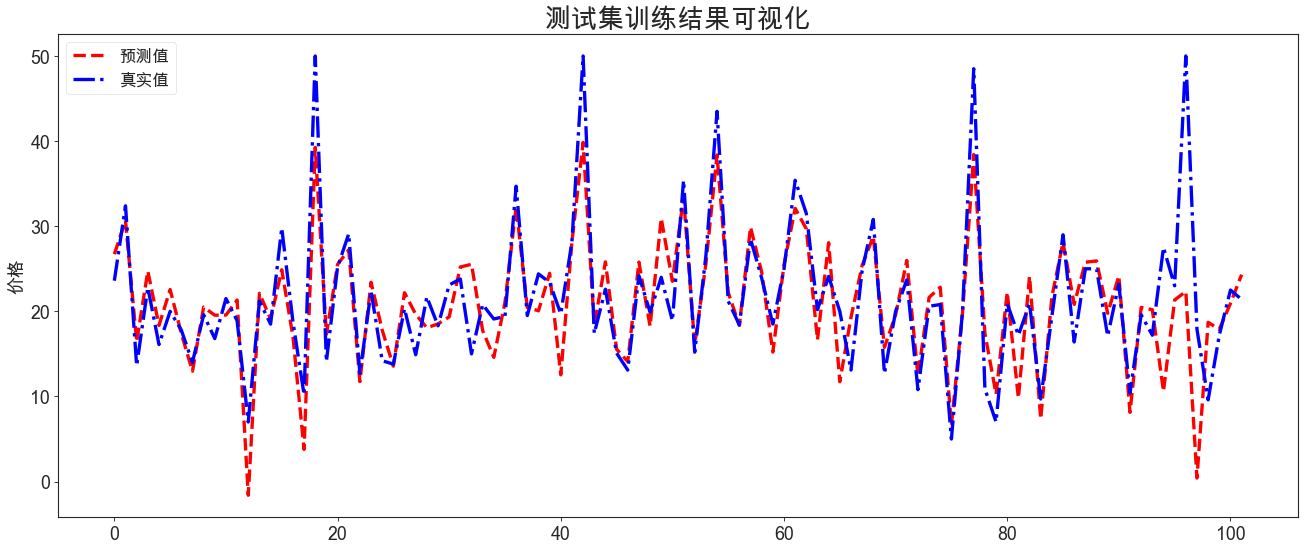

In [90]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,8),dpi=80)
plt.style.use(style)
plt.title('测试集训练结果可视化',size=24)
plt.ylabel('价格',size=16)

plt.xticks(size=16)
plt.yticks(size=16)

plt.plot(y_test_pred,linewidth=3.,linestyle='--',color='red')
plt.plot(y_test.values,linewidth=3.,linestyle='-.',color='blue')
plt.legend(['预测值','真实值'],fontsize=15);

## Evaluation

In [92]:
from sklearn.metrics import mean_squared_error

mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print("训练误差:{}, 测试误差:{}".format(mse_train, mse_test))

训练误差:27.238577411646844, 测试误差:27.114957415580566
